# Explore Walkthrough
---

## Let's start by importing our libraries

In [1]:
import wrangle
import split_scale
import matplotlib.pyplot as plt
import seaborn as sns

## Now lets bring in our data with our wrangle function

In [2]:
telco = wrangle.wrangle_telco()
telco

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


## Now lets split our data into train and test sets

In [3]:
telco_train, telco_test = split_scale.single_split_my_data(telco, .7, 13)
telco_train

,customer_id,monthly_charges,tenure,total_charges
1415,8313-AFGBW,73.60,47,3522.65
891,5360-XGYAZ,65.65,72,4664.50
280,1725-IQNIY,109.75,54,6110.20
971,5859-HZYLF,19.15,26,515.75
1392,8207-DMRVL,114.55,72,8306.05
...,...,...,...,...
750,4656-CAURT,23.95,69,1713.10
1562,9225-BZLNZ,85.25,72,6083.10
74,0455-ENTCR,85.25,66,5538.35
176,1063-DHQJF,92.15,69,6480.90


## Now lets plot the relationships of each column with a regression line

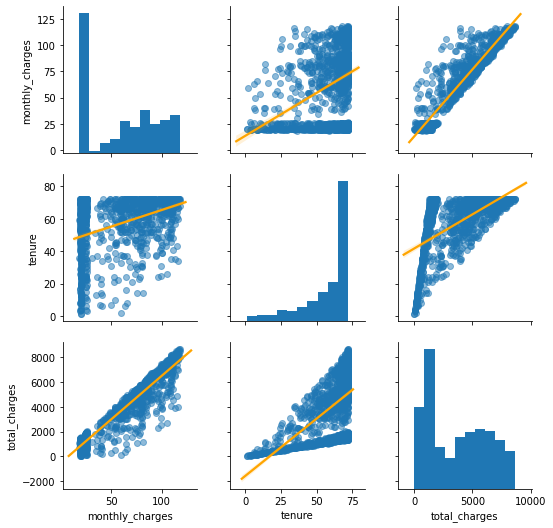

In [4]:
sns.pairplot(telco_train, kind='reg', plot_kws={'line_kws':{'color':'orange'}, 'scatter_kws': {'alpha': 0.5}})

## So we see that there is a pretty strong relationship between total_charges and monthly charges

## Let's make a funciton that creates this graph

In [5]:
def plot_variable_pairs(df):
    sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'orange'}})

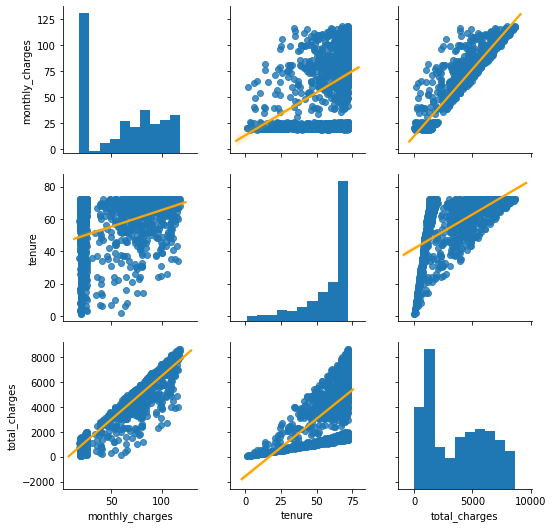

In [6]:
plot_variable_pairs(telco_train)

## Great, now there aren't any catagorical variables in this dataset, but we can easily make one. Let's create a function that adds years to our dataset using tenure

In [7]:
telco_train

,customer_id,monthly_charges,tenure,total_charges
1415,8313-AFGBW,73.60,47,3522.65
891,5360-XGYAZ,65.65,72,4664.50
280,1725-IQNIY,109.75,54,6110.20
971,5859-HZYLF,19.15,26,515.75
1392,8207-DMRVL,114.55,72,8306.05
...,...,...,...,...
750,4656-CAURT,23.95,69,1713.10
1562,9225-BZLNZ,85.25,72,6083.10
74,0455-ENTCR,85.25,66,5538.35
176,1063-DHQJF,92.15,69,6480.90


In [8]:
def months_to_years(months_column, df):
    df['tenure_years'] = (months_column / 12).astype(int)
    return df

In [9]:
telco_train_w_years = months_to_years(telco_train.tenure, telco_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Great! Now let's visualize with year as a catagory

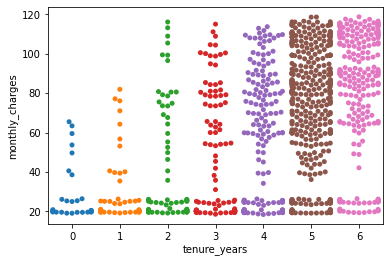

In [10]:
sns.swarmplot(x='tenure_years', y='monthly_charges', data=telco_train)

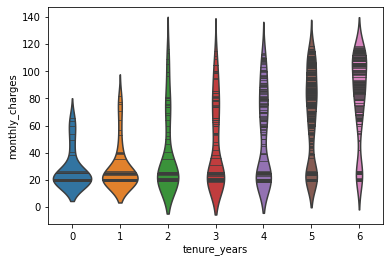

In [11]:
sns.violinplot(x='tenure_years', y='monthly_charges', data=telco_train, inner='stick')

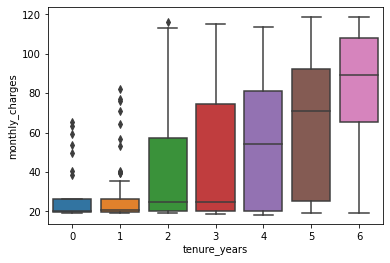

In [12]:
sns.boxplot(x='tenure_years', y='monthly_charges', data=telco_train)

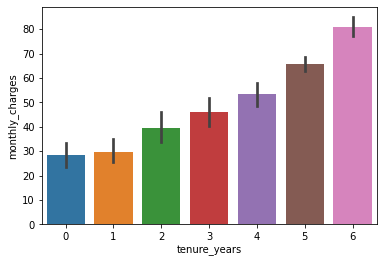

In [13]:
sns.barplot(x='tenure_years', y='monthly_charges', data=telco_train)

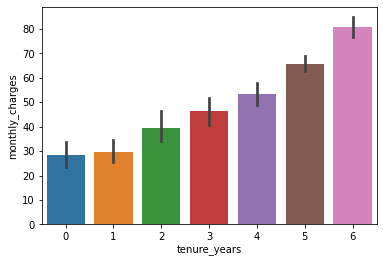

In [14]:
sns.barplot(x='tenure_years', y='monthly_charges', data=telco_train)

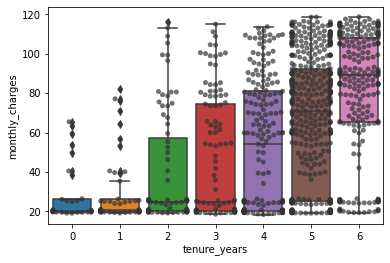

In [15]:
sns.boxplot(x='tenure_years', y='monthly_charges', data=telco_train)
sns.swarmplot(x='tenure_years', y='monthly_charges', data=telco_train, color='.2', alpha=.7)

## Now lets get them all onto one figure

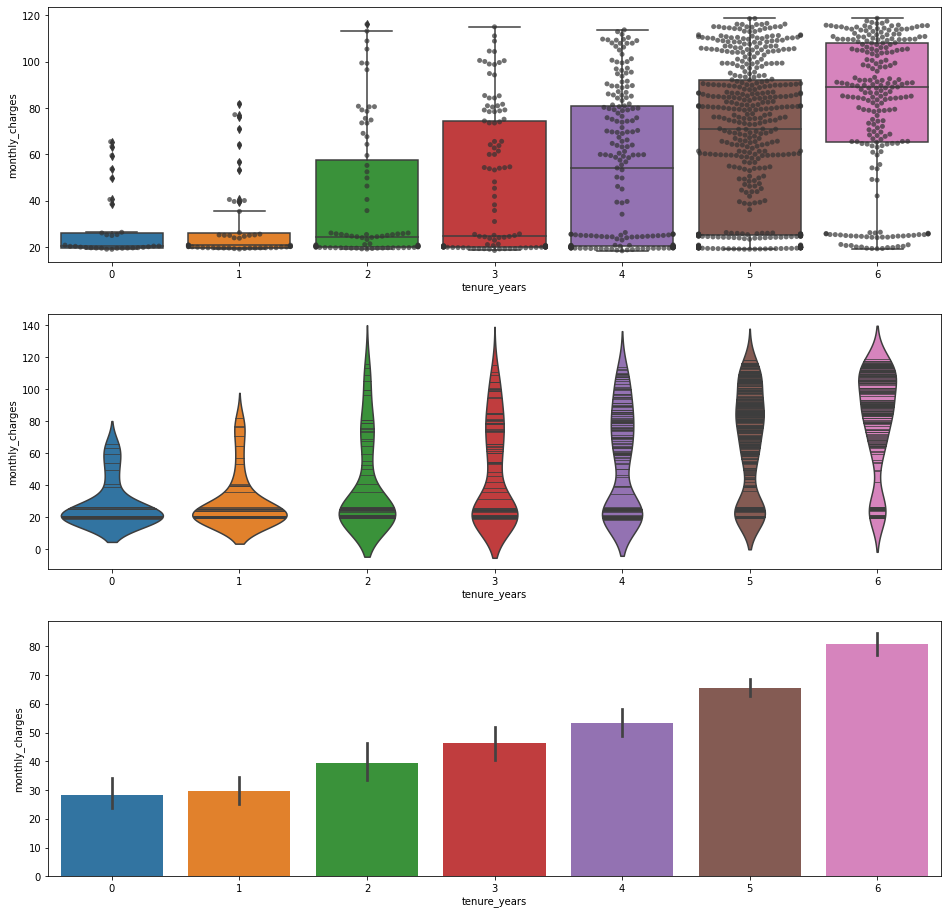

In [16]:
f, axes = plt.subplots(3, 1, figsize=(16, 16))

sns.boxplot(x='tenure_years', y='monthly_charges', data=telco_train, ax=axes[0])
sns.swarmplot(x='tenure_years', y='monthly_charges', data=telco_train, color='.2', alpha=.7, ax=axes[0])
sns.violinplot(x='tenure_years', y='monthly_charges', data=telco_train, inner='stick', ax=axes[1])
sns.barplot(x='tenure_years', y='monthly_charges', data=telco_train, ax=axes[2])
plt.show()

## And now let's make a function that creates this each time

In [17]:
def plot_categorical_continuous_vars(categorical_var, continuous_var, df):
    f, axes = plt.subplots(3, 1, figsize=(16, 16))

    sns.boxplot(x=categorical_var, y=continuous_var, data=df, ax=axes[0])
    sns.swarmplot(x=categorical_var, y=continuous_var, data=df, color='.2', alpha=.7, ax=axes[0])
    sns.violinplot(x=categorical_var, y=continuous_var, data=df, inner='stick', ax=axes[1])
    sns.barplot(x=categorical_var, y=continuous_var, data=df, ax=axes[2])

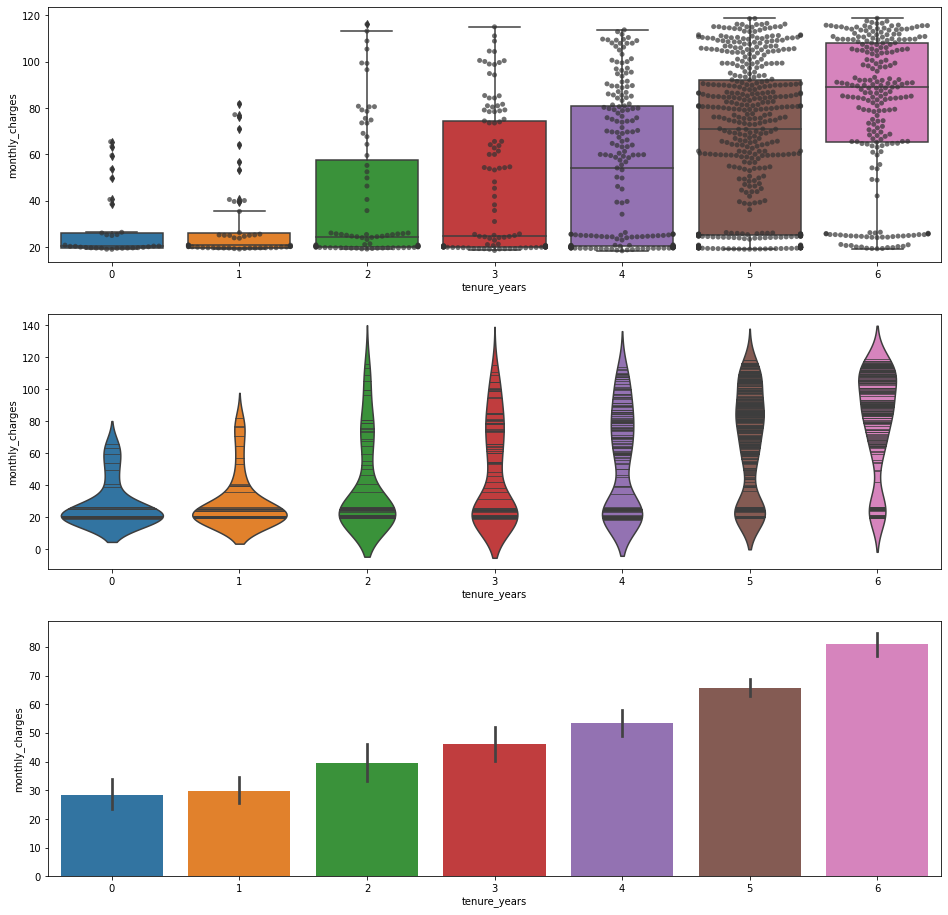

In [18]:
plot_categorical_continuous_vars('tenure_years', 'monthly_charges', telco_train)